In [1]:
#Had to open Anaconda Prompt and follow the link after inputing: "jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10"
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
    
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9eeccfdb-215f-486d-8dd5-b45d9f9814d2',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-04-13T06:18:28.388Z', 'error_code': 0, 'error_message': None, 'elapsed': 88, 'credit_count': 1, 'notice': None, 'total_count': 9179}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10157, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

#pd.set_option('display.max_columns', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] =pd.Timestamp.now() #to_datetime('now') has will be derprecated in future versions used "Timestamp.now()" instead
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10157,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.934486e+07,1.934486e+07,...,47.2456,6.323205e+11,NaN,2023-04-13T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 00:18:31.090382
1,1027,Ethereum,ETH,ethereum,6719,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,...,18.7685,2.313942e+11,NaN,2023-04-13T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 00:18:31.090382
2,825,Tether,USDT,tether,51144,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.057880e+10,8.309174e+10,...,6.5430,8.316798e+10,NaN,2023-04-13T06:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-13 00:18:31.090382
3,1839,BNB,BNB,bnb,1255,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578714e+08,1.578714e+08,...,4.0861,5.037187e+10,NaN,2023-04-13T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 00:18:31.090382
4,3408,USD Coin,USDC,usd-coin,11725,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.205355e+10,3.205355e+10,...,2.6001,3.205075e+10,NaN,2023-04-13T06:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-13 00:18:31.090382
5,52,XRP,XRP,xrp,929,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,...,2.1285,5.069900e+10,NaN,2023-04-13T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 00:18:31.090382
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.476764e+10,3.567775e+10,...,1.1475,1.830832e+10,NaN,2023-04-13T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 00:18:31.090382
7,74,Dogecoin,DOGE,dogecoin,682,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.389178e+11,1.389178e+11,...,0.9398,1.158504e+10,NaN,2023-04-13T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 00:18:31.090382
8,3890,Polygon,MATIC,polygon,652,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,9.219469e+09,1.000000e+10,...,0.8323,1.112774e+10,NaN,2023-04-13T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 00:18:31.090382
9,5426,Solana,SOL,solana,454,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.916421e+08,5.393127e+08,...,0.7623,1.294123e+10,NaN,2023-04-13T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 00:18:31.090382


In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9eeccfdb-215f-486d-8dd5-b45d9f9814d2',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] =pd.Timestamp.now() #to_datetime('now') has will be deprecated in future versions used "Timestamp.now()" instead
    df_append = pd.DataFrame(df) #df = df2.append(df2) is going to be deprecated
    df = pd.concat([df2,df_append])
    
    if not os.path.isfile(r'C:\Users\LesT3\Documents\Python Scripts\coinmarketcapapi.csv'):
        df.to_csv(r'C:\Users\LesT3\Documents\Python Scripts\coinmarketcapapi.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\LesT3\Documents\Python Scripts\coinmarketcapapi.csv', mode='a', header = False)
    

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Finished Running')
    sleep(259) #sleeps every 4.32 minutes so we can run 333 times per day
exit() 

{'status': {'timestamp': '2023-04-13T06:18:35.668Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 9179}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10157, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [7]:
df69 = pd.read_csv(r'C:\Users\LesT3\Documents\Python Scripts\coinmarketcapapi.csv')
df69

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10157,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.934464e+07,...,47.1277,6.282136e+11,NaN,2023-04-12T22:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-12 16:45:53.267326
1,1,1027,Ethereum,ETH,ethereum,6719,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204578e+08,...,18.8063,2.309789e+11,NaN,2023-04-12T22:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-12 16:45:53.267326
2,2,825,Tether,USDT,tether,51137,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.045962e+10,...,6.5546,8.313672e+10,NaN,2023-04-12T22:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-12 16:45:53.267326
3,3,1839,BNB,BNB,bnb,1255,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578859e+08,...,4.1144,5.053340e+10,NaN,2023-04-12T22:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-12 16:45:53.267326
4,4,3408,USD Coin,USDC,usd-coin,11717,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.205641e+10,...,2.6089,3.204555e+10,NaN,2023-04-12T22:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-12 16:45:53.267326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,15,1958,TRON,TRX,tron,748,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem']",NaN,9.084958e+10,...,0.4790,5.904351e+09,NaN,2023-04-13T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 00:18:31.090382
12336,16,4943,Dai,DAI,multi-collateral-dai,2173,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,5.213450e+09,...,0.4231,5.215173e+09,NaN,2023-04-13T06:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2023-04-13 00:18:31.090382
12337,17,3717,Wrapped Bitcoin,WBTC,wrapped-bitcoin,1126,2019-01-30T00:00:00.000Z,"['medium-of-exchange', 'defi', 'wrapped-tokens...",NaN,1.505506e+05,...,0.3680,4.536031e+09,NaN,2023-04-13T06:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,2023-04-13 00:18:31.090382
12338,18,1975,Chainlink,LINK,chainlink,1091,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",1.000000e+09,5.171000e+08,...,0.3040,7.247327e+09,NaN,2023-04-13T06:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2023-04-13 00:18:31.090382


In [8]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10160,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.934522e+07,1.934522e+07,...,46.8189,6.382479e+11,NaN,2023-04-13T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 11:28:45.944166
1,1027,Ethereum,ETH,ethereum,6720,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,...,19.2752,2.420585e+11,NaN,2023-04-13T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 11:28:45.944166
2,825,Tether,USDT,tether,51185,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.057880e+10,8.309174e+10,...,6.4195,8.316547e+10,NaN,2023-04-13T17:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-13 11:28:45.944166
3,1839,BNB,BNB,bnb,1255,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578713e+08,1.578713e+08,...,4.0802,5.124835e+10,NaN,2023-04-13T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 11:28:45.944166
4,3408,USD Coin,USDC,usd-coin,11746,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.194320e+10,3.194320e+10,...,2.5423,3.194014e+10,NaN,2023-04-13T17:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-13 11:28:45.944166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,1958,TRON,TRX,tron,748,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem]",NaN,9.084958e+10,9.084958e+10,...,0.4790,5.904351e+09,NaN,2023-04-13T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 00:18:31.090382
16,4943,Dai,DAI,multi-collateral-dai,2173,2019-11-22T00:00:00.000Z,"[defi, stablecoin, asset-backed-stablecoin, et...",NaN,5.213450e+09,5.213450e+09,...,0.4231,5.215173e+09,NaN,2023-04-13T06:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2023-04-13 00:18:31.090382
17,3717,Wrapped Bitcoin,WBTC,wrapped-bitcoin,1126,2019-01-30T00:00:00.000Z,"[medium-of-exchange, defi, wrapped-tokens, fan...",NaN,1.505506e+05,1.505506e+05,...,0.3680,4.536031e+09,NaN,2023-04-13T06:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,2023-04-13 00:18:31.090382
18,1975,Chainlink,LINK,chainlink,1091,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, sub...",1.000000e+09,5.171000e+08,1.000000e+09,...,0.3040,7.247327e+09,NaN,2023-04-13T06:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2023-04-13 00:18:31.090382


In [9]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10160,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19345218.00000,19345218.00000,...,46.81890,638247866602.33997,NaN,2023-04-13T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 11:28:45.944166
1,1027,Ethereum,ETH,ethereum,6720,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120457776.00000,120457776.00000,...,19.27520,242058515110.17001,NaN,2023-04-13T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 11:28:45.944166
2,825,Tether,USDT,tether,51185,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,80578797765.59442,83091735571.84532,...,6.41950,83165474760.13000,NaN,2023-04-13T17:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-13 11:28:45.944166
3,1839,BNB,BNB,bnb,1255,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157871302.22832,157871302.22832,...,4.08020,51248353369.05000,NaN,2023-04-13T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 11:28:45.944166
4,3408,USD Coin,USDC,usd-coin,11746,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,31943199318.79651,31943199318.79651,...,2.54230,31940140882.63000,NaN,2023-04-13T17:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-13 11:28:45.944166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,1958,TRON,TRX,tron,748,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem]",NaN,90849579529.18317,90849579529.18317,...,0.47900,5904351092.50000,NaN,2023-04-13T06:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-13 00:18:31.090382
16,4943,Dai,DAI,multi-collateral-dai,2173,2019-11-22T00:00:00.000Z,"[defi, stablecoin, asset-backed-stablecoin, et...",NaN,5213449683.88906,5213449683.88906,...,0.42310,5215173018.67000,NaN,2023-04-13T06:16:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2023-04-13 00:18:31.090382
17,3717,Wrapped Bitcoin,WBTC,wrapped-bitcoin,1126,2019-01-30T00:00:00.000Z,"[medium-of-exchange, defi, wrapped-tokens, fan...",NaN,150550.57514,150550.57514,...,0.36800,4536031220.59000,NaN,2023-04-13T06:16:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,2023-04-13 00:18:31.090382
18,1975,Chainlink,LINK,chainlink,1091,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, sub...",1000000000.00000,517099970.45279,1000000000.00000,...,0.30400,7247326782.52000,NaN,2023-04-13T06:16:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2023-04-13 00:18:31.090382


In [11]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.11189,0.71894,7.55236,20.90066,37.87689,59.30374
Ethereum,0.06273,3.32867,3.27613,13.81195,26.68158,38.00829
Tether,-0.00898,0.01075,0.07431,-0.36222,0.06458,0.07309
BNB,-0.06622,0.41484,2.24641,3.14321,2.99402,11.14505
USD Coin,-0.00646,0.00938,0.01603,0.07956,-0.01813,-0.01317
XRP,-0.00401,0.22202,0.64246,35.17948,32.66000,35.25898
Cardano,-0.00653,3.07304,5.44419,16.65193,11.02112,24.19380
Dogecoin,-0.01979,3.17481,-7.38649,14.16746,2.28555,5.56062
Polygon,0.23232,2.13614,-0.49803,-6.39468,-11.59274,23.07282


In [12]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.11189
         quote.USD.percent_change_24h    0.71894
         quote.USD.percent_change_7d     7.55236
         quote.USD.percent_change_30d   20.90066
         quote.USD.percent_change_60d   37.87689
                                          ...   
Uniswap  quote.USD.percent_change_24h    2.93450
         quote.USD.percent_change_7d    -2.35078
         quote.USD.percent_change_30d   -3.62138
         quote.USD.percent_change_60d   -7.47764
         quote.USD.percent_change_90d   -1.07565
Length: 120, dtype: float64

In [13]:
type(df3)

pandas.core.frame.DataFrame

In [14]:
type(df4)

pandas.core.series.Series

In [15]:
df5 = df4.to_frame(name = "%change")
df5


%change
name                                         
Bitcoin quote.USD.percent_change_1h  -0.11189
        quote.USD.percent_change_24h  0.71894
        quote.USD.percent_change_7d   7.55236
        quote.USD.percent_change_30d 20.90066
        quote.USD.percent_change_60d 37.87689
...                                       ...
Uniswap quote.USD.percent_change_24h  2.93450
        quote.USD.percent_change_7d  -2.35078
        quote.USD.percent_change_30d -3.62138
        quote.USD.percent_change_60d -7.47764
        quote.USD.percent_change_90d -1.07565

[120 rows x 1 columns]

In [16]:
df5.count()

%change    120
dtype: int64

In [17]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,%change
0,Bitcoin,quote.USD.percent_change_1h,-0.11189
1,Bitcoin,quote.USD.percent_change_24h,0.71894
2,Bitcoin,quote.USD.percent_change_7d,7.55236
3,Bitcoin,quote.USD.percent_change_30d,20.90066
4,Bitcoin,quote.USD.percent_change_60d,37.87689
...,...,...,...
115,Uniswap,quote.USD.percent_change_24h,2.93450
116,Uniswap,quote.USD.percent_change_7d,-2.35078
117,Uniswap,quote.USD.percent_change_30d,-3.62138
118,Uniswap,quote.USD.percent_change_60d,-7.47764


In [18]:
df7 = df6.rename(columns={'level_1': 'Timeframe'})
df7

,name,Timeframe,%change
0,Bitcoin,quote.USD.percent_change_1h,-0.11189
1,Bitcoin,quote.USD.percent_change_24h,0.71894
2,Bitcoin,quote.USD.percent_change_7d,7.55236
3,Bitcoin,quote.USD.percent_change_30d,20.90066
4,Bitcoin,quote.USD.percent_change_60d,37.87689
...,...,...,...
115,Uniswap,quote.USD.percent_change_24h,2.93450
116,Uniswap,quote.USD.percent_change_7d,-2.35078
117,Uniswap,quote.USD.percent_change_30d,-3.62138
118,Uniswap,quote.USD.percent_change_60d,-7.47764


In [19]:
df7['Timeframe'] = df7['Timeframe'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_1d','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr','24hr','1d','7d','30d','60d','90d'])
df7

,name,Timeframe,%change
0,Bitcoin,1hr,-0.11189
1,Bitcoin,24hr,0.71894
2,Bitcoin,7d,7.55236
3,Bitcoin,30d,20.90066
4,Bitcoin,60d,37.87689
...,...,...,...
115,Uniswap,24hr,2.93450
116,Uniswap,7d,-2.35078
117,Uniswap,30d,-3.62138
118,Uniswap,60d,-7.47764


In [91]:
#plots weren't showing up so added sns.set() and %matplotlib inline
import seaborn as sns
sns.set() 
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt

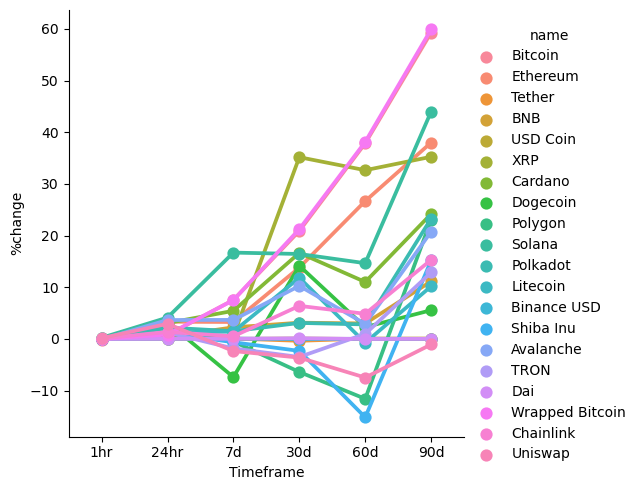

In [21]:
sns.catplot(x='Timeframe', y ='%change', hue='name', data=df7, kind='point')

In [81]:


df8= df[['slug','quote.USD.price','timestamp']]
df8 = df8.query("slug =='bitcoin'")
df8

df9 = df8.reset_index()
df9

,index,slug,quote.USD.price,timestamp
0,0,bitcoin,30392.75555,2023-04-13 11:28:45.944166
1,0,bitcoin,30412.47076,2023-04-13 11:24:26.579781
2,0,bitcoin,30397.48342,2023-04-13 11:20:07.281146
3,0,bitcoin,30406.79617,2023-04-13 11:15:47.866766
4,0,bitcoin,30374.36023,2023-04-13 11:03:27.399287
5,0,bitcoin,30347.92754,2023-04-13 10:59:08.038217
6,0,bitcoin,30321.97680,2023-04-13 10:54:48.784252
7,0,bitcoin,30316.91810,2023-04-13 10:50:29.570508
8,0,bitcoin,30366.41253,2023-04-13 10:46:10.203745
9,0,bitcoin,30400.83966,2023-04-13 10:41:46.639307


In [82]:
df9.index.is_unique # unable to plot using sns because of dupliates so I checked for duplicates. Turned out that the key values were the same

True

In [66]:
#df9 = df8[~df8.index.duplicated(keep='last')] # was trying to remove dupliates but reindexed instead so that key alues were distinct

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

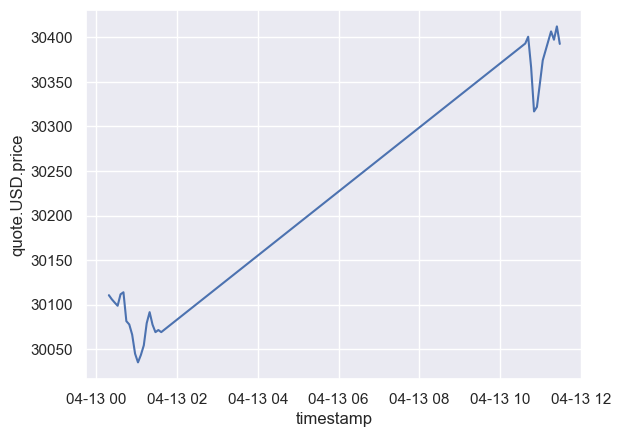

In [92]:
sns.lineplot(x='timestamp', y='quote.USD.price', data = df9)

,index,slug,quote.USD.price,timestamp
0,0,bitcoin,30392.75555,2023-04-13 11:28:45.944166
1,0,bitcoin,30412.47076,2023-04-13 11:24:26.579781
2,0,bitcoin,30397.48342,2023-04-13 11:20:07.281146
3,0,bitcoin,30406.79617,2023-04-13 11:15:47.866766
4,0,bitcoin,30374.36023,2023-04-13 11:03:27.399287
5,0,bitcoin,30347.92754,2023-04-13 10:59:08.038217
6,0,bitcoin,30321.97680,2023-04-13 10:54:48.784252
7,0,bitcoin,30316.91810,2023-04-13 10:50:29.570508
8,0,bitcoin,30366.41253,2023-04-13 10:46:10.203745
9,0,bitcoin,30400.83966,2023-04-13 10:41:46.639307
